# Housing Pricing Prediction - Canada 

In [16]:
# imports
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Base_dir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))

In [21]:
# load dataset 
# [dataset source: https://www.kaggle.com/datasets/reenapinto/housing-price-and-real-estate-2023/data?select=Homes+for+Sale+and+Real+Estate.xlsx]
data_fname = os.path.join(Base_dir, "data", "housing_price-canada-2023.xlsx")
if os.path.exists(data_fname):
    print("Loading data from: {}".format(data_fname))
    df = pd.read_excel(data_fname)
else:
    print("Data file not found: {}".format(data_fname))

Loading data from: /home/kabilan/Documents/Personal_Projects/DataAnalysis/data/housing_price-canada-2023.xlsx


In [22]:
df.head(5)

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


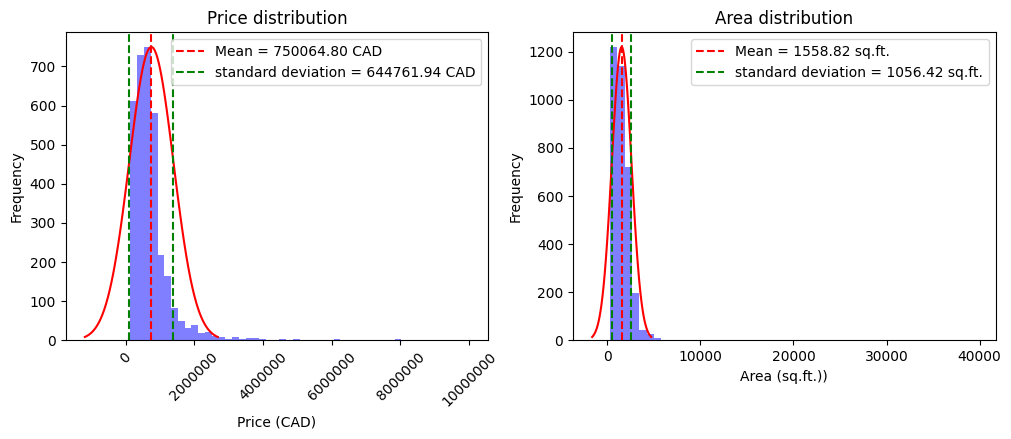

In [40]:
# plot gaussian distribution of price and area
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# price distribution
n,_,_ = ax[0].hist(df['Price'], bins=50, alpha=0.5, color='b')
mu, sigma = df['Price'].mean(), df['Price'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = n.max() * np.exp(-0.5 * ((x - mu)/sigma)**2)
ax[0].plot(x, y, color='r')
ax[0].axvline(mu, color='r', linestyle='--', label='Mean = {:.2f} CAD'.format(mu))
ax[0].axvline(mu + sigma, color='g', linestyle='--', label='standard deviation = {:.2f} CAD'.format(sigma))
ax[0].axvline(mu - sigma, color='g', linestyle='--')
ax[0].set_xlabel('Price (CAD)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Price distribution')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].get_xaxis().get_major_formatter().set_scientific(False)
ax[0].legend()

# area distribution
n,_,_ = ax[1].hist(df['Sq.Ft'], bins=50, alpha=0.5, color='b')
mu, sigma = df['Sq.Ft'].mean(), df['Sq.Ft'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = n.max() * np.exp(-0.5 * ((x - mu)/sigma)**2)
ax[1].plot(x, y, color='r')
ax[1].axvline(mu, color='r', linestyle='--', label='Mean = {:.2f} sq.ft.'.format(mu))
ax[1].axvline(mu + sigma, color='g', linestyle='--', label='standard deviation = {:.2f} sq.ft.'.format(sigma))
ax[1].axvline(mu - sigma, color='g', linestyle='--')
ax[1].set_xlabel('Area (sq.ft.))')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Area distribution')
ax[1].legend()
plt.show()

# End 